<a href="https://colab.research.google.com/github/skflwright/learning_rep/blob/main/Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using TensorFlow

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(101)

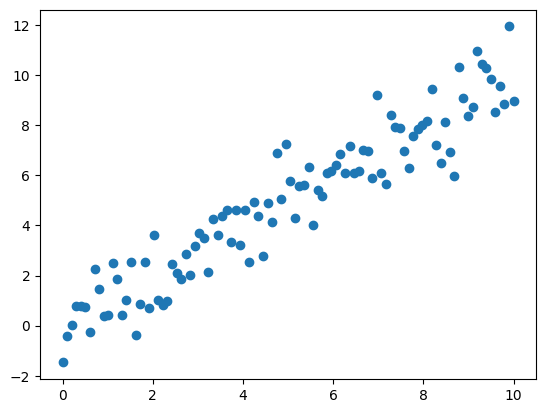

In [ ]:
# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# the training dataset
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

# plot of data
plt.scatter(x_train, y_train)

In [ ]:
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)

In [ ]:
# Define linear regression expression y
def linreg(x):
    y = weight*x + bias
    return y

In [ ]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Get gradients
        gradients = tape.gradient(loss, [weight, bias])

        # Adjust weights
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)

    # Print output
    print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")


Epoch count 0: Loss value: 34.09203338623047
Epoch count 1: Loss value: 4.302308559417725
Epoch count 2: Loss value: 1.3476277589797974
Epoch count 3: Loss value: 1.0544785261154175
Epoch count 4: Loss value: 1.0253040790557861
Epoch count 5: Loss value: 1.0223119258880615
Epoch count 6: Loss value: 1.021917462348938
Epoch count 7: Loss value: 1.0217816829681396
Epoch count 8: Loss value: 1.0216724872589111
Epoch count 9: Loss value: 1.0215668678283691
Epoch count 10: Loss value: 1.0214624404907227
Epoch count 11: Loss value: 1.0213592052459717
Epoch count 12: Loss value: 1.021256923675537
Epoch count 13: Loss value: 1.021155595779419
Epoch count 14: Loss value: 1.0210554599761963
Epoch count 15: Loss value: 1.0209561586380005
Epoch count 16: Loss value: 1.0208579301834106
Epoch count 17: Loss value: 1.0207605361938477
Epoch count 18: Loss value: 1.0206642150878906
Epoch count 19: Loss value: 1.0205687284469604
Epoch count 20: Loss value: 1.0204744338989258
Epoch count 21: Loss value: 

In [ ]:
print(weight.numpy())
print(bias.numpy())

0.9842016
0.062572256


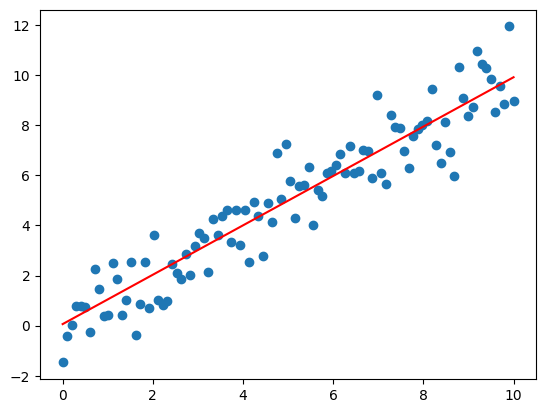

In [ ]:
# Plot the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()

# Using PyTorch

In [ ]:
import numpy as np
import torch
from torch.autograd import Variable

In [ ]:
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype = np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype = np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'

In [ ]:
model = linearRegression(inputDim, outputDim)

In [ ]:
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epoch):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(103.3136, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 103.31361389160156
tensor(8.6481, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 8.648106575012207
tensor(0.9241, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 0.9240672588348389
tensor(0.2916, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 0.29160112142562866
tensor(0.2376, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 0.23759816586971283
tensor(0.2308, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 0.23080581426620483
tensor(0.2279, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 0.2278907299041748
tensor(0.2253, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 0.22531841695308685
tensor(0.2228, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 0.22280000150203705
tensor(0.2203, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 0.22031192481517792
tensor(0.2179, device='cuda:0', grad_fn=<MseLossBackward0>)
epo

In [ ]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.47027114]
 [ 2.546557  ]
 [ 4.622843  ]
 [ 6.6991286 ]
 [ 8.775414  ]
 [10.851701  ]
 [12.927986  ]
 [15.004272  ]
 [17.080559  ]
 [19.156843  ]
 [21.23313   ]]


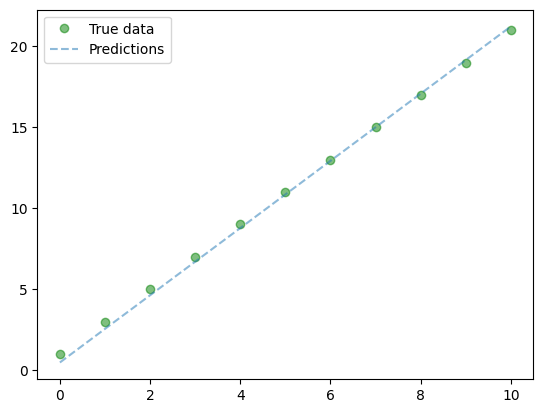

In [ ]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()